### OBJECTIVE
To predict the default on credit data based on different features about the individuals from the credit data.


### TASK 1: Exploratory Data Analysis(EDA)

In [2]:
#importing relevant libraries 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
df_train=pd.read_csv("train.csv",index_col=0)
df_test=pd.read_csv("test.csv",index_col=0)



In [4]:
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


1.1 Number of rows and columns in train and test data


In [5]:
print(df_train.shape)
print(df_test.shape)

(27000, 24)
(3003, 24)


In [6]:
print(list(df_train.columns))

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']


In [8]:
df_train.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

1.4	Plots of relationship of various independent variables with dependent variable

In [9]:
#Relationship between Gender and Fraud(Default)
Y=df_train["Y"]
X2=df_train["X2"]
cross_norm1 = pd.crosstab(X2, Y, normalize=0)
cross = pd.crosstab(X2, Y)

In [10]:
cross

Y,0,1
X2,,
1,7957,2523
2,13070,3450


In [11]:
cross_norm1

Y,0,1
X2,,
1,0.759256,0.240744
2,0.791162,0.208838


The above table shows that out of 100 males, approx 75 males do not make default however 25 do. Similarly, out of 100 females 80 do no default on their credit payments while 20 do make a default.

In [12]:
df_train[(df_train["Y"]==1)]["X2"].value_counts(normalize=True)

2    0.577599
1    0.422401
Name: X2, dtype: float64

In [13]:
df_train[(df_train["Y"]==0)]["X2"].value_counts(normalize=True)

2    0.621582
1    0.378418
Name: X2, dtype: float64

In [14]:
#Education vs Default
X3=df_train["X3"]

#clubbing under 4
X3.replace({5:4, 6:4, 0:4}, inplace=True)\

cross_norm2 = pd.crosstab(X3, Y, normalize=0)
cross_norm2



Y,0,1
X3,,
1,0.807263,0.192737
2,0.762505,0.237495
3,0.748321,0.251679
4,0.940447,0.059553


In the above table, lets consider X3==1, which contains all the graduated individuls. Out of 100 graduated individuals, approx 80 do not default and 20 default. While for an individual with high school level education(X3==3), out of 100, 74 do not default and 24 do. It seems like that educated people are less likely to make a default.

In [15]:
#Marriage VS Default
X4=df_train["X4"].replace({0:3}, inplace=False)

cross_norm_X4 = pd.crosstab(X4, Y, normalize=0)
cross_norm_X4



Y,0,1
X4,,
1,0.765893,0.234107
2,0.790132,0.209868
3,0.757396,0.242604


[Text(0.5, 0, 'Default'), Text(0, 0.5, 'Age')]

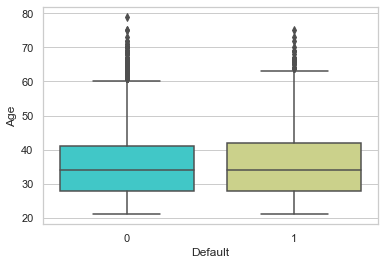

In [16]:
#Age Vs Defualt
sns.boxplot(x='Y',y='X5',data=df_train,palette='rainbow').set(xlabel="Default", ylabel="Age")

In [17]:
df_train["X5"].describe()

count    27000.000000
mean        35.393148
std          9.231699
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

<AxesSubplot:xlabel='X3', ylabel='X1'>

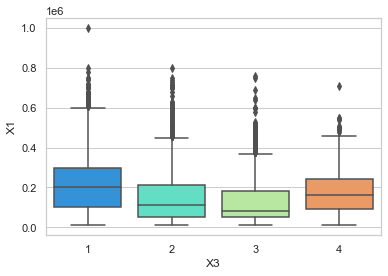

In [18]:
#Credit Limit vs Education
sns.boxplot(x='X3',y='X1',data=df_train,palette='rainbow')
#ax.set(ylim=(0, 1500000)





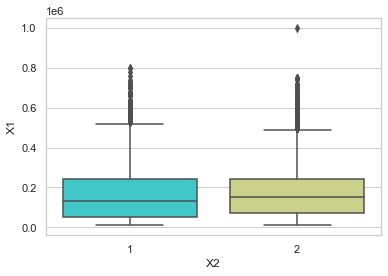

In [19]:
#Credit Limit vs Gender
sns.boxplot(x='X2',y='X1',data=df_train,palette='rainbow');
#ax.set(ylim=(0, 1500000)


In [20]:
df_train["X1"].describe()

count      27000.000000
mean      167278.284444
std       129775.805524
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: X1, dtype: float64

In [21]:
#Gender vs Education
cross_norm_5 = pd.crosstab(X2, X3, normalize=0)
cross_norm_5

X3,1,2,3,4
X2,,,,
1,0.371374,0.452385,0.163168,0.013073
2,0.344492,0.481477,0.157930,0.016102


In [22]:
df_train["X2_X3"]=df_train["X2"].astype(str) + df_train["X3"].astype(str)
df_train["X2_X3"].value_counts()

22    7954
21    5691
12    4741
11    3892
23    2609
13    1710
24     266
14     137
Name: X2_X3, dtype: int64

In [23]:
#Default vs Gender*Education
X2_X3=df_train["X2_X3"]
cross_norm_X2_X3 = pd.crosstab(X2_X3, Y, normalize=0)
cross_norm_X2_X3

Y,0,1
X2_X3,,
11,0.792909,0.207091
12,0.737397,0.262603
13,0.728070,0.271930
14,0.948905,0.051095
21,0.817080,0.182920
22,0.777470,0.222530
23,0.761594,0.238406
24,0.936090,0.063910


For example: 11 means educated male: out of 100 males, 20 commit fraud,
             13 means high school educated male: out of 100 males, 27 committ fraud

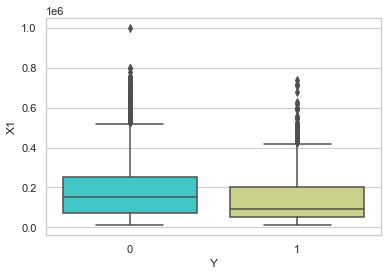

In [24]:
#Credit Limit vs Default
sns.boxplot(x='Y',y='X1',data=df_train,palette='rainbow');
#ax.set(ylim=(0, 1500000)

In [25]:
df_train["X6"].value_counts(normalize=True)

 0    0.491037
-1    0.191074
 1    0.122963
-2    0.090037
 2    0.089704
 3    0.010407
 4    0.002667
 5    0.000778
 8    0.000704
 6    0.000333
 7    0.000296
Name: X6, dtype: float64

In [26]:
df_train["X7"].value_counts(normalize=True)

 0    0.524481
-1    0.202704
 2    0.131333
-2    0.124630
 3    0.010852
 4    0.003074
 1    0.000963
 5    0.000815
 7    0.000741
 6    0.000370
 8    0.000037
Name: X7, dtype: float64

In [27]:
df_train["X8"].value_counts(normalize=True)

 0    0.525815
-1    0.198815
-2    0.134852
 2    0.127593
 3    0.007630
 4    0.002519
 7    0.001000
 6    0.000852
 5    0.000704
 1    0.000148
 8    0.000074
Name: X8, dtype: float64

In [28]:
df_train["X9"].value_counts(normalize=True)

 0    0.550889
-1    0.190074
-2    0.143074
 2    0.104148
 3    0.006148
 4    0.002259
 7    0.001778
 5    0.001296
 6    0.000185
 1    0.000074
 8    0.000074
Name: X9, dtype: float64

In [29]:
df_train["X10"].value_counts(normalize=True)

 0    0.564519
-1    0.185222
-2    0.149926
 2    0.088852
 3    0.006074
 4    0.002889
 7    0.001815
 5    0.000556
 6    0.000111
 8    0.000037
Name: X10, dtype: float64

In [30]:
df_train["X11"].value_counts(normalize=True)

 0    0.541296
-1    0.192889
-2    0.161296
 2    0.094037
 3    0.006407
 4    0.001593
 7    0.001407
 6    0.000630
 5    0.000370
 8    0.000074
Name: X11, dtype: float64

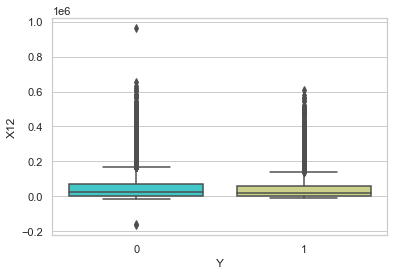

In [31]:
#Credit Limit vs Default
sns.boxplot(x='Y',y='X12',data=df_train,palette='rainbow');
#ax.set(ylim=(0, 1500000)

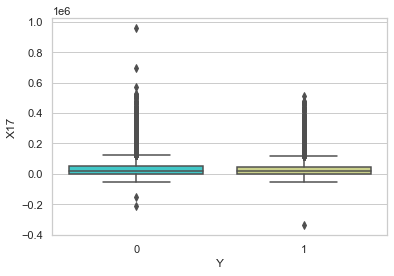

In [32]:
#Credit Limit vs Default
sns.boxplot(x='Y',y="X17",data=df_train,palette='rainbow');
#ax.set(ylim=(0, 1500000)

Checking the impact of past bill apyments on the defaults.

i) X17: Amount Paid in October 2005

In [33]:
df_train[df_train["Y"]==1]["X17"].describe()

count      5973.000000
mean      38090.466600
std       58896.145141
min     -339603.000000
25%        1150.000000
50%       18082.000000
75%       47272.000000
max      514975.000000
Name: X17, dtype: float64

In [34]:
df_train[df_train["Y"]==0]["X17"].describe()

count     21027.000000
mean      39095.235649
std       59466.338485
min     -209051.000000
25%        1270.000000
50%       16776.000000
75%       49873.000000
max      961664.000000
Name: X17, dtype: float64

ii) X23: Amount Paid in April 2005

In [35]:
df_train[df_train["Y"]==1]["X23"].describe()

count      5973.000000
mean       3344.844802
std       12858.029385
min           0.000000
25%           0.000000
50%        1000.000000
75%        2927.000000
max      345293.000000
Name: X23, dtype: float64

In [36]:
df_train[df_train["Y"]==0]["X23"].describe()

count     21027.000000
mean       5693.565416
std       18568.684967
min           0.000000
25%         299.500000
50%        1700.000000
75%        4524.500000
max      528666.000000
Name: X23, dtype: float64

iii) Amount Paid in September 2005

In [37]:
df_train[df_train["Y"]==1]["X18"].describe()


count      5973.000000
mean       3336.113678
std        9021.948598
min           0.000000
25%           0.000000
50%        1647.000000
75%        3458.000000
max      300000.000000
Name: X18, dtype: float64

In [38]:
df_train[df_train["Y"]==0]["X18"].describe()

count     21027.000000
mean       6207.594331
std       16434.696042
min           0.000000
25%        1160.500000
50%        2451.000000
75%        5600.000000
max      505000.000000
Name: X18, dtype: float64

### TASK 2: MODEL BUILDING AND EVALUATION

Task 2.1: 
Build a simple logistic regression model with sklearn implementation. Find the model performance metrics such as Accuracy, ROC-AUC score, Confusion matrix (Precision, Recall and F1-score).

In [39]:
df_train
df_train["X2_X3"] = df_train["X2_X3"].astype(int)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 1 to 27000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      27000 non-null  int64
 1   X2      27000 non-null  int64
 2   X3      27000 non-null  int64
 3   X4      27000 non-null  int64
 4   X5      27000 non-null  int64
 5   X6      27000 non-null  int64
 6   X7      27000 non-null  int64
 7   X8      27000 non-null  int64
 8   X9      27000 non-null  int64
 9   X10     27000 non-null  int64
 10  X11     27000 non-null  int64
 11  X12     27000 non-null  int64
 12  X13     27000 non-null  int64
 13  X14     27000 non-null  int64
 14  X15     27000 non-null  int64
 15  X16     27000 non-null  int64
 16  X17     27000 non-null  int64
 17  X18     27000 non-null  int64
 18  X19     27000 non-null  int64
 19  X20     27000 non-null  int64
 20  X21     27000 non-null  int64
 21  X22     27000 non-null  int64
 22  X23     27000 non-null  int64
 23  Y       270

In [284]:
#Selecting Features and Targets
Y=df_train["Y"]
df_train.columns
X=df_train[["X1", "X2", "X3",'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23']]


Splitting DATA


In [285]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20250, 23)
(20250,)
(6750, 23)
(6750,)


Data has been splitted into 75:25.

In [286]:
logreg_base = LogisticRegression(solver="newton-cg") #instantiate

In [287]:
#fit the model with the data
logreg_base.fit(X_train, Y_train)

C:\Users\hasla\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(solver='newton-cg')

TRAINING DATA EVALUATION

In [288]:
#predictions
Y_pred=logreg_base.predict(X_train)
print(Y_pred.shape)
import numpy as np
from sklearn import metrics
np.unique(Y_pred, return_counts=True)

tn, fp, fn, tp = metrics.confusion_matrix(Y_train, Y_pred).ravel()

precision = tp/(tp+fp)
print(precision)

recall = tp/(tp+fn)
print(recall)

f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

(20250,)
0.6999316473000684
0.22903153656900022
F1-score is 0.34512976070104484


TEST DATA EVALUATION

In [289]:
#predictions
Y_pred=logreg_base.predict(X_test)
print(Y_pred.shape)
import numpy as np
from sklearn import metrics
np.unique(Y_pred, return_counts=True)

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()

precision = tp/(tp+fp)
print(precision)

recall = tp/(tp+fn)
print(recall)

f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

(6750,)
0.7148760330578512
0.2303595206391478
F1-score is 0.34843907351460224


We have evaluated the baseline results. However, we can re-scale the training data and see if there is any significant improvement.


In [46]:
from sklearn.preprocessing import MinMaxScaler


In [47]:
scaler = MinMaxScaler()

In [48]:
print(scaler.fit(X_train))

MinMaxScaler()


In [49]:
print(scaler.data_max_)

[1.000000e+06 2.000000e+00 4.000000e+00 3.000000e+00 7.500000e+01
 8.000000e+00 7.000000e+00 8.000000e+00 8.000000e+00 8.000000e+00
 8.000000e+00 9.645110e+05 9.839310e+05 1.664089e+06 8.915860e+05
 9.271710e+05 9.616640e+05 5.050000e+05 1.684259e+06 8.960400e+05
 5.288970e+05 4.179900e+05 5.286660e+05 2.400000e+01]


In [50]:
print(scaler.data_min_)

[ 1.00000e+04  1.00000e+00  1.00000e+00  0.00000e+00  2.10000e+01
 -2.00000e+00 -2.00000e+00 -2.00000e+00 -2.00000e+00 -2.00000e+00
 -2.00000e+00 -1.65580e+05 -6.97770e+04 -1.57264e+05 -1.70000e+05
 -8.13340e+04 -2.09051e+05  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  1.10000e+01]


In [51]:
X_train_scaled = scaler.transform(X_train)

In [52]:
X_test_scaled=scaler.transform(X_test)

In [103]:
logreg_scaled = LogisticRegression(solver="saga", max_iter=300) #instantiate

In [104]:
#fit the model with the data
logreg_scaled.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=300, solver='saga')

TRAINING DATA EVALUATION

In [105]:
from sklearn import metrics

In [171]:
#predictions
Y_pred_train=logreg_scaled.predict(X_train_scaled)
print(Y_pred_train.shape)
print(np.unique(Y_pred_train, return_counts=True))
Y_pred_trainprob = logreg_scaled.predict_proba(X_train_scaled)

tn, fp, fn, tp =metrics.confusion_matrix(Y_train, Y_pred_train).ravel()
print(f"TP is {tp}")
print(f"FP is {fp}")
print(f"FN is {fn}")
print(f"TN is {tn}")

precision = tp/(tp+fp)
print(f"Precision is {precision}")
recall = tp/(tp+fn)
print(f"Recall is {recall}")
f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

roc_auc = metrics.roc_auc_score(Y_train, Y_pred_trainprob[:,1])
print(f"ROC AUC score is {roc_auc}")

accuracy_score = metrics.accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score is {accuracy_score}")



(20250,)
(array([0, 1], dtype=int64), array([18890,  1360], dtype=int64))
TP is 967
FP is 393
FN is 3504
TN is 15386
Precision is 0.7110294117647059
Recall is 0.21628271080295236
F1-score is 0.3316755273537986
ROC AUC score is 0.7176287535325816
Accuracy score is 0.8075555555555556


Test Data Evaluation

In [107]:
#predictions
Y_pred=logreg_scaled.predict(X_test_scaled)
print(Y_pred.shape)
Y_pred_prob = logreg_scaled.predict_proba(X_test_scaled)
np.unique(Y_pred, return_counts=True)

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()

print(f"TP is {tp}")
print(f"FP is {fp}")
print(f"FN is {fn}")
print(f"TN is {tn}")

precision = tp/(tp+fp)
print(f"Precision is {precision}")
recall = tp/(tp+fn)
print(f"Recall is {recall}")
f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

roc_auc = metrics.roc_auc_score(Y_test, Y_pred_prob[:,1])
print(f"ROC AUC score is {roc_auc}")

accuracy_score = metrics.accuracy_score(Y_test, Y_pred)
print(f"Accuracy score is {accuracy_score}")


(6750,)
TP is 324
FP is 136
FN is 1178
TN is 5112
Precision is 0.7043478260869566
Recall is 0.21571238348868177
F1-score is 0.33027522935779824
ROC AUC score is 0.7262972286950732
Accuracy score is 0.8053333333333333


In [60]:
logreg_scaled.coef_

array([[-1.08493564e+00, -2.81562500e-04, -3.54728885e-01,
        -4.32702492e-01,  3.65275729e-01,  5.47302465e+00,
         9.89351206e-01,  9.28152469e-01, -4.65887758e-03,
         1.59134289e-01,  1.82100668e-01, -2.27131385e+00,
        -1.47833722e-01, -5.43360263e-01, -1.18096100e-01,
         2.73611397e-01,  5.63624328e-01, -2.65442372e+00,
        -1.56550535e+00, -1.34101015e+00, -1.22442076e+00,
        -1.13756846e+00, -1.66138180e+00, -8.20770986e-02]])

Now we will use some techniques to improve the performance of the model. 


In [77]:
(324+5112)/6750

0.8053333333333333

# K-fold cross validation



# Objective

Build a logistic regression with k-fold cross validation. Find the model performance metrics such as Accuracy, ROC-AUC score, Confusion matrix (Precision, Recall and F1-score) on the best model of cross validation.

In [108]:
#Importing Libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [109]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [114]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [122]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(solver= 'saga', max_iter=300)
result=model_selection.cross_validate(model, X_train_scaled, Y_train, cv=kf, scoring=scoring, return_train_score=True,
                                     return_estimator=True)


In [127]:
result

{'fit_time': array([0.67505217, 0.69206381, 0.66528368, 0.66396356, 0.68568969,
        0.57602477, 0.57536197, 0.57422066, 0.69700718, 0.71977282]),
 'score_time': array([0.01606297, 0.00800252, 0.01502371, 0.02609205, 0.01552582,
        0.01565814, 0.        , 0.00962663, 0.02332473, 0.0155921 ]),
 'estimator': [LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga'),
  LogisticRegression(max_iter=300, solver='saga')],
 'test_accuracy': array([0.81580247, 0.80740741, 0.80345679, 0.81382716, 0.81234568,
        0.79753086, 0.80938272, 0.81333333, 0.80395062, 0.79604938]),
 'train_accuracy': 

In [130]:
best_iteration = result["test_f1_score"].argmax()
best_f1_score = result["test_f1_score"][best_iteration]
print(f"Best F1-score is {best_f1_score}")

best_precision = result["test_precision"][best_iteration]
print(f"Precision at best f1-score iteration is {best_precision}")

best_f1_recall = result["test_recall"][best_iteration]
print(f"Recall at best F1-score iteration is {best_f1_recall}")

best_accuracy = result["test_accuracy"][best_iteration]
print(f"Accuracy at best F1-score iteration is {best_accuracy}")




Best F1-score is 0.36638655462184877
Precision at best f1-score iteration is 0.7266666666666667
Recall at best F1-score iteration is 0.2449438202247191
Accuracy at best F1-score iteration is 0.8138271604938272


In [167]:
best_model = result["estimator"][2]
#done through checking for test data


TRAINING DATA EVALUATION IN K-Fold CV

In [168]:
#predictions
Y_pred_train=best_model.predict(X_train_scaled)
print(Y_pred_train.shape)
print(np.unique(Y_pred_train, return_counts=True))
Y_pred_trainprob = logreg_scaled.predict_proba(X_train_scaled)

tn, fp, fn, tp =metrics.confusion_matrix(Y_train, Y_pred_train).ravel()
print(f"TP is {tp}")
print(f"FP is {fp}")
print(f"FN is {fn}")
print(f"TN is {tn}")

precision = tp/(tp+fp)
print(f"Precision is {precision}")
recall = tp/(tp+fn)
print(f"Recall is {recall}")
f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

roc_auc = metrics.roc_auc_score(Y_train, Y_pred_trainprob[:,1])
print(f"ROC AUC score is {roc_auc}")

accuracy_score = metrics.accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy score is {accuracy_score}")



(20250,)
(array([0, 1], dtype=int64), array([18827,  1423], dtype=int64))
TP is 1014
FP is 409
FN is 3457
TN is 15370
Precision is 0.7125790583274771
Recall is 0.22679490046969358
F1-score is 0.34407872412623003
ROC AUC score is 0.7176287535325816
Accuracy score is 0.8090864197530864


TEST DATA EVALUATION IN K-Fold CV

In [170]:
#predictions
Y_pred=best_model.predict(X_test_scaled)
print(Y_pred.shape)
Y_pred_prob = logreg_scaled.predict_proba(X_test_scaled)
np.unique(Y_pred, return_counts=True)

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()

print(f"TP is {tp}")
print(f"FP is {fp}")
print(f"FN is {fn}")
print(f"TN is {tn}")

precision = tp/(tp+fp)
print(f"Precision is {precision}")
recall = tp/(tp+fn)
print(f"Recall is {recall}")
f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

roc_auc = metrics.roc_auc_score(Y_test, Y_pred_prob[:,1])
print(f"ROC AUC score is {roc_auc}")

accuracy_score = metrics.accuracy_score(Y_test, Y_pred)
print(f"Accuracy score is {accuracy_score}")


(6750,)
TP is 338
FP is 140
FN is 1164
TN is 5108
Precision is 0.7071129707112971
Recall is 0.22503328894806923
F1-score is 0.3414141414141414
ROC AUC score is 0.7262972286950732
Accuracy score is 0.8068148148148148


# Regularization

It is not needed since its less likely to find the evidence of overfitting.

# Feature Engineering

In [178]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X2_X3
6518,80000,1,2,2,27,2,-1,-1,0,0,...,35783,35488,36020,700,1074,35000,1300,1400,1300,12
16398,20000,2,3,1,42,0,0,0,0,0,...,17496,18219,18783,1300,1300,1280,1000,1000,1107,23
16267,190000,2,3,2,46,0,0,0,0,0,...,132016,134632,137470,4536,4696,4791,4811,5000,5033,23
24679,230000,2,1,2,28,-1,0,0,0,0,...,39998,23278,27775,12000,2353,5000,0,8000,643,21
15202,50000,2,2,2,23,3,2,2,2,0,...,24693,25283,27367,0,3200,910,1000,2500,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,60000,2,1,2,24,0,0,0,0,0,...,32158,28991,28434,1553,2000,1508,1080,1003,1000,21
5391,200000,1,1,2,37,2,2,2,2,2,...,164182,169029,172084,13500,6000,0,7500,6000,4000,11
861,50000,1,1,2,26,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,11
15796,70000,2,2,2,25,0,0,0,0,2,...,35122,28633,28039,3000,2000,4500,1200,0,1200,22


In [222]:
X_train_education=X_train[["X3"]]
X_test_education = X_test[["X3"]]
X_train_education.value_counts()

X3
2     9511
1     7183
3     3250
4      306
dtype: int64

In [204]:
logreg = LogisticRegression(solver="saga", max_iter=500)

In [205]:
logreg.fit(X_train_education, Y_train)

LogisticRegression(max_iter=500, solver='saga')

In [213]:
#OneHot Encoding

enc = preprocessing.OneHotEncoder()
enc.fit(X_train_education)
onehotlabels = enc.transform(X_train_education).toarray()
onehotlabels.shape

(20250, 4)

In [214]:
onehotlabels

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [224]:
logreg = LogisticRegression(solver="saga", max_iter=500)

In [225]:
logreg.fit(X_train_education, Y_train)

LogisticRegression(max_iter=500, solver='saga')

In [249]:
Y_pred_proba = logreg.predict_proba(X_test_education)[:,1]
Y_pred_proba[0:10]
Y_pred_classes = np.array([1 if val >= 0.21 else 0 for val in Y_pred_proba])
print(np.unique(Y_pred_classes, return_counts=True))

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred_classes).ravel()

precision = tp/(tp+fp)
print(precision)

recall = tp/(tp+fn)
print(recall)

f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

(array([0, 1]), array([2400, 4350], dtype=int64))
0.24114942528735633
0.6984021304926764
F1-score is 0.3585099111414901


In [221]:
#predictions
Y_pred=logreg.predict(X_test)
Y_pred_proba = logreg.predict_proba(X_test)
print(Y_pred.shape)
import numpy as np
from sklearn import metrics
np.unique(Y_pred, return_counts=True)

tn, fp, fn, tp = metrics.confusion_matrix(Y_train, Y_pred).ravel()

precision = tp/(tp+fp)
print(precision)

recall = tp/(tp+fn)
print(recall)

f1 = 2*precision*recall /(precision+recall)
print(f"F1-score is {f1}")

(20250,)
nan
0.0
F1-score is nan


<ipython-input-221-be1729b9850f>:10: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp)


# TESTING ON UNSEEN DATA

In [300]:
df_test= pd.read_csv("test2.csv").iloc[1:,:]

In [301]:

df_id=df_test ["ID"]

In [302]:
df_id
df_test.drop(columns=["ID"], inplace=True,)

In [303]:
df_test.drop(columns=["Y"], inplace=True,)

In [304]:
X_score=df_test[["X1", "X2", "X3",'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23']]

In [305]:
X_score

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,300000,1,2,1,45,-1,-1,-1,-1,-1,...,360,360,1440,360,360,360,360,1440,360,360
2,340000,1,2,2,41,-2,-2,-2,-2,-2,...,-20,4016,6209,2081,3842,0,4036,6254,2091,1917
3,110000,1,1,2,30,0,0,0,0,2,...,63100,70391,68661,77511,3000,3000,9000,0,10000,3000
4,50000,1,2,1,41,0,0,0,0,0,...,7471,8043,19526,7564,1200,2000,2000,3000,1000,10640
5,20000,1,2,1,40,0,0,0,0,0,...,5622,19263,18433,26132,3010,2010,15000,4000,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
2999,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
3000,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
3001,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [306]:
y_pred_score=logreg_base.predict(X_score)

In [307]:
y_pred_score

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [310]:
submit=pd.DataFrame([df_id.values, y_pred_score]).T
submit.columns = ["ID","Y"]
submit

,ID,Y
0,1.0,0.0
1,2.0,0.0
2,3.0,0.0
3,4.0,0.0
4,5.0,0.0
...,...,...
2997,2998.0,0.0
2998,2999.0,0.0
2999,3000.0,1.0
3000,3001.0,0.0


In [312]:
submit.Y.value_counts()

0.0    2807
1.0     195
Name: Y, dtype: int64

In [313]:
195/3000

0.065

In [314]:
submit.to_csv("credit_default_predictions.csv",header=True, index=False)

In [315]:
pwd

'C:\\Users\\hasla\\Movies\\Python'